In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''


## Bayesian Linear Regression

In Bayesian linear regression, we place a prior distribution over the model parameters $ \mathbf{w} $, which helps prevent overfitting and automatically determines model complexity.

## Prior Distribution

$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mathbf{m}_0, \mathbf{S}_0)
$$

where:
- $ \mathbf{m}_0 $ is the prior mean.
- $ \mathbf{S}_0 $ is the prior covariance.

## Likelihood Function

The likelihood of the target values $ \mathbf{t} $ given the weights $ \mathbf{w} $ is:

$$
p(\mathbf{t} | \mathbf{w}) = \mathcal{N}(\mathbf{t} | \Phi \mathbf{w}, \beta^{-1} \mathbf{I})
$$

where:
- $ \Phi $ is the design matrix.
- $ \beta $ is the precision (inverse variance) of the noise.

## Posterior Distribution

The posterior distribution is proportional to the product of the likelihood and the prior:

$$
p(\mathbf{w} | \mathbf{t}) \propto p(\mathbf{t} | \mathbf{w}) p(\mathbf{w})
$$

Since both are Gaussian, the posterior is also Gaussian:

$$
p(\mathbf{w} | \mathbf{t}) = \mathcal{N}(\mathbf{w} | \mathbf{m}_N, \mathbf{S}_N)
$$

where:
$$
\mathbf{m}_N = \mathbf{S}_N \left( \mathbf{S}_0^{-1} \mathbf{m}_0 + \beta \Phi^\top \mathbf{t} \right)
$$

$$
\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \beta \Phi^\top \Phi
$$

## Special Case: Zero-Mean Isotropic Prior

Assuming a zero-mean isotropic Gaussian prior:

$$
p(\mathbf{w} | \alpha) = \mathcal{N}(\mathbf{w} | \mathbf{0}, \alpha^{-1} \mathbf{I})
$$

The posterior simplifies to:

$$
\mathbf{m}_N = \beta \mathbf{S}_N \Phi^\top \mathbf{t}
$$

$$
\mathbf{S}_N^{-1} = \alpha \mathbf{I} + \beta \Phi^\top \Phi
$$

## Log Posterior

The log posterior is given by:

$$
\ln p(\mathbf{w} | \mathbf{t}) = -\frac{\beta}{2} \sum_{n=1}^N \left( t_n - \mathbf{w}^\top \boldsymbol{\phi}(x_n) \right)^2 - \frac{\alpha}{2} \mathbf{w}^\top \mathbf{w} + \text{const.}
$$

Maximizing the posterior is equivalent to minimizing the regularized sum-of-squares error:

$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left( t_n - \mathbf{w}^\top \boldsymbol{\phi}(x_n) \right)^2 + \frac{\lambda}{2} \|\mathbf{w}\|^2
$$

where $ \lambda = \frac{\alpha}{\beta} $.

## Sequential Update

When new data arrives, the posterior can be updated incrementally. The posterior after observing $ N $ data points becomes the prior for the next step:

$$
\mathbf{m}_N = \mathbf{S}_N \left( \mathbf{S}_0^{-1} \mathbf{m}_0 + \beta \Phi^\top \mathbf{t} \right)
$$

$$
\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \beta \Phi^\top \Phi
$$

## Conclusion

Bayesian linear regression provides a principled framework for combining prior knowledge with observed data, preventing overfitting and optimizing model complexity.

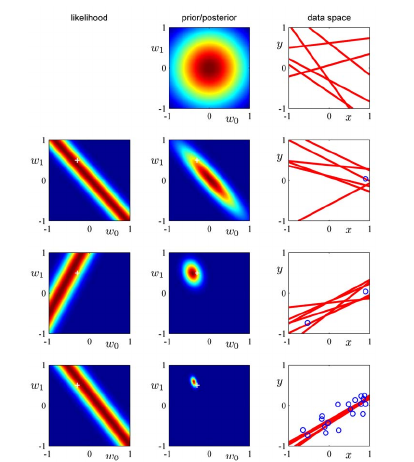

Fig.7 Illustration of sequential Bayesian learning for a simple linear model of the form y(x, w) = w0 + w1 x. A detailed description of this ﬁgure is given in the text.



## Bayesian Linear Regression: Predictive Distribution

In Bayesian linear regression, the posterior distribution over parameters $ \mathbf{w} $ can be used to make predictions for new input values. This section explores the predictive distribution and its properties.

## Generalized Prior

A generalized form of the Gaussian prior over $ \mathbf{w} $ is given by:

$$
p(\mathbf{w} | \alpha) = \frac{1}{Z_q} \exp \left( -\frac{1}{2} \sum_{j=1}^M |w_j|^q \right)
$$

where:
- $ q = 2 $ corresponds to the Gaussian distribution.
- $ Z_q $ is the normalization constant.
  
For $ q = 2 $, the prior is conjugate to the likelihood, but this does not hold for other values of $ q $.

## Predictive Distribution

Given a new input $ \mathbf{x} $, the predictive distribution for the target $ t $is given by:

$$
p(t | \mathbf{x}, \mathbf{t}, \alpha, \beta) = \int p(t | \mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w} | \mathbf{t}, \alpha, \beta) \, d\mathbf{w}
$$

Since both $ p(t | \mathbf{x}, \mathbf{w}, \beta) $ and $ p(\mathbf{w} | \mathbf{t}, \alpha, \beta) $ are Gaussian, their convolution yields:

$$
p(t | \mathbf{x}, \mathbf{t}, \alpha, \beta) = \mathcal{N}(t | \mathbf{m}_N^\top \boldsymbol{\phi}(\mathbf{x}), \sigma_N^2(\mathbf{x}))
$$

## Predictive Variance

The variance of the predictive distribution is:

$$
\sigma_N^2(\mathbf{x}) = \frac{1}{\beta} + \boldsymbol{\phi}(\mathbf{x})^\top \mathbf{S}_N \boldsymbol{\phi}(\mathbf{x})
$$

where:
- $ \frac{1}{\beta} $ is the noise variance.
- $ \boldsymbol{\phi}(\mathbf{x}) $ is the basis function vector.
- $ \mathbf{S}_N $ is the posterior covariance of $ \mathbf{w} $.

The predictive variance consists of two terms:
1. **Noise variance**: Represents the inherent noise in the data.
2. **Model uncertainty**: Reflects the uncertainty in the parameter estimates, which decreases as more data is observed.

## Behavior of Predictive Variance

As the number of data points $ N $ increases, the posterior covariance $ \mathbf{S}_N $ shrinks, reducing the uncertainty term in $ \sigma_N^2(\mathbf{x}) $. In the limit $ N \to \infty $, the second term vanishes, and the predictive variance is dominated by the noise variance:

$$
\sigma_N^2(\mathbf{x}) \to \frac{1}{\beta}
$$

## Example: Sinusoidal Data

Consider fitting a model using 9 Gaussian basis functions to a sinusoidal data set:

- The green curve represents the true function $ \sin(2\pi x) $.
- The red curve shows the mean of the predictive distribution.
- The shaded region represents one standard deviation around the mean.

As more data points are added $( N = 1, 2, 4, 25 $), the predictive uncertainty decreases, especially near the data points.

## Insights into Covariance

To visualize the covariance between predictions at different inputs, we can sample from the posterior distribution of $ \mathbf{w} $ and plot the resulting functions $ y(\mathbf{x}, \mathbf{w}) $. These functions illustrate how the model uncertainty affects predictions across the input space.


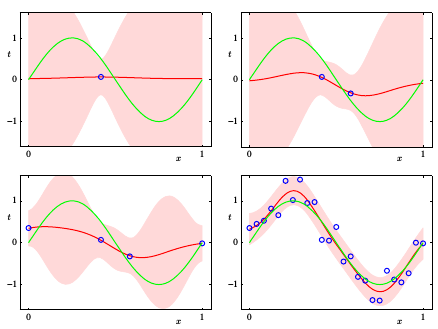 

Fig.8 Examples of the predictive distribution (3.58) for a model consisting of 9 Gaussian basis functions of the form (3.4) using the synthetic sinusoidal data set of Section 1.1. See the text for a detailed discussion.

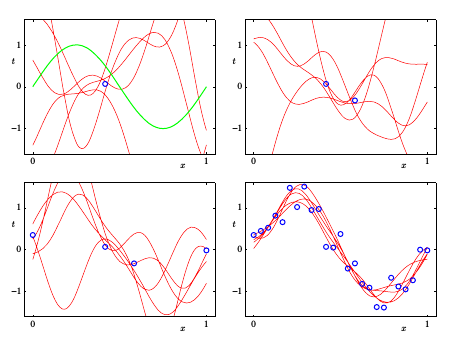

Fig.9 Plots of the function y(x, w) using samples from the posterior distributions over w corresponding to the plots in Fig.8.

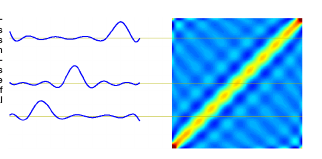

Fig.10 The equivalent kernel k(x, $x^1$ ) for the Gaussian basis functions in Fig.1, shown as a plot of x versus x , together with three slices through this matrix cor- responding to three different values of x. The data set used to generate this kernel comprised 200 values of x equally spaced over the interval (−1, 1).

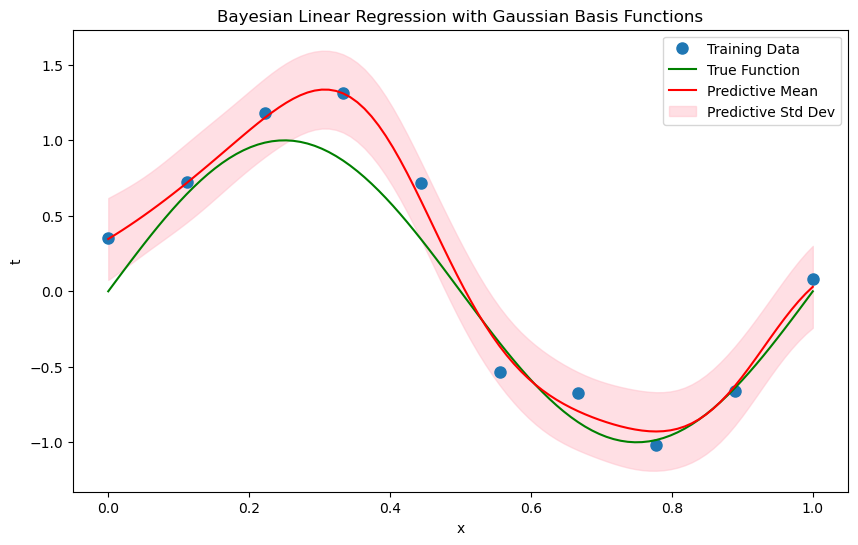

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(num_points=10, noise_std=0.2):
    X = np.linspace(0, 1, num_points)
    Y = np.sin(2 * np.pi * X) + noise_std * np.random.randn(num_points)
    return X, Y

# Gaussian basis functions
def gaussian_basis(x, centers, width):
    return np.exp(-((x - centers) ** 2) / (2 * width ** 2))

# Design matrix
def design_matrix(X, centers, width):
    return np.array([gaussian_basis(x, centers, width) for x in X])

# Bayesian linear regression
def bayesian_linear_regression(X, Y, centers, width, alpha, beta):
    Phi = design_matrix(X, centers, width)
    
    # Prior parameters
    S0 = np.eye(Phi.shape[1]) / alpha
    m0 = np.zeros(Phi.shape[1])
    
    # Posterior parameters
    SN_inv = np.linalg.inv(S0) + beta * Phi.T @ Phi
    SN = np.linalg.inv(SN_inv)
    mN = SN @ (beta * Phi.T @ Y)
    
    return mN, SN

# Predictive distribution
def predictive_distribution(X_new, mN, SN, centers, width, beta):
    Phi_new = design_matrix(X_new, centers, width)
    mean = Phi_new @ mN
    variance = 1 / beta + np.sum(Phi_new @ SN * Phi_new, axis=1)
    return mean, np.sqrt(variance)

# Main program
np.random.seed(0)
X, Y = generate_data(10)
centers = np.linspace(0, 1, 9)  # Gaussian basis centers
width = 0.1
alpha = 2.0
beta = 25.0

mN, SN = bayesian_linear_regression(X, Y, centers, width, alpha, beta)

# Predict for new inputs
X_new = np.linspace(0, 1, 100)
mean, std_dev = predictive_distribution(X_new, mN, SN, centers, width, beta)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'o', label='Training Data', markersize=8)
plt.plot(X_new, np.sin(2 * np.pi * X_new), 'g', label='True Function')
plt.plot(X_new, mean, 'r', label='Predictive Mean')
plt.fill_between(X_new, mean - std_dev, mean + std_dev, color='pink', alpha=0.5, label='Predictive Std Dev')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.title('Bayesian Linear Regression with Gaussian Basis Functions')
plt.show()


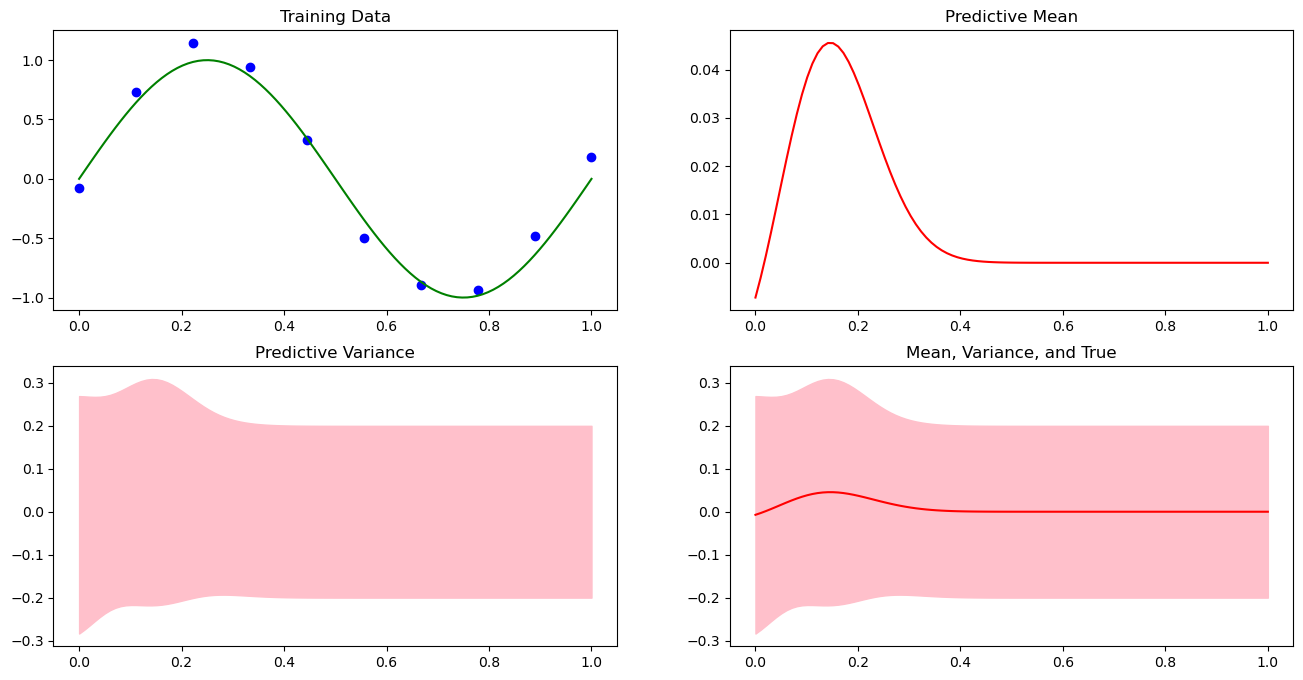

In [4]:
import random
import math
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_data(num_points=10, noise_std=0.2):
    X = [i / (num_points - 1) for i in range(num_points)]
    Y = [math.sin(2 * math.pi * x) + noise_std * (random.random() * 2 - 1) for x in X]
    return X, Y

# Gaussian basis functions
def gaussian_basis(x, centers, width):
    return [math.exp(-((x - c) ** 2) / (2 * width ** 2)) for c in centers]

# Design matrix
def design_matrix(X, centers, width):
    return [gaussian_basis(x, centers, width) for x in X]

# Matrix operations
def transpose(matrix):
    return list(map(list, zip(*matrix)))

def matmul(A, B):
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

def matadd(A, B):
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def inverse_2x2(M):
    # Assumes M is 2x2 for simplicity
    det = M[0][0] * M[1][1] - M[0][1] * M[1][0]
    return [[M[1][1] / det, -M[0][1] / det],
            [-M[1][0] / det, M[0][0] / det]]

def scalar_mult(matrix, scalar):
    return [[scalar * x for x in row] for row in matrix]

# Bayesian linear regression
def bayesian_linear_regression(X, Y, centers, width, alpha, beta):
    Phi = design_matrix(X, centers, width)
    Phi_T = transpose(Phi)

    S0 = [[(1 / alpha) if i == j else 0 for j in range(len(centers))] for i in range(len(centers))]
    SN_inv = matadd(S0, scalar_mult(matmul(Phi_T, Phi), beta))
    SN = inverse_2x2(SN_inv)  # Simplified for 2x2 matrix

    mN = matmul(matmul(SN, Phi_T), [[y] for y in Y])
    mN = [row[0] for row in mN]

    return mN, SN

# Predictive distribution
def predictive_distribution(X_new, mN, SN, centers, width, beta):
    Phi_new = design_matrix(X_new, centers, width)
    mean = [sum(m * phi for m, phi in zip(mN, row)) for row in Phi_new]

    variances = [1 / beta + sum(phi_row[i] * SN[i][j] * phi_row[j] for i in range(len(SN)) for j in range(len(SN[0])))
                 for phi_row in Phi_new]
    return mean, [math.sqrt(v) for v in variances]

# Main program
X, Y = generate_data(10)
centers = [i / 9 for i in range(9)]  # 9 Gaussian centers
width = 0.1
alpha = 2.0
beta = 25.0

mN, SN = bayesian_linear_regression(X, Y, centers, width, alpha, beta)

X_new = [i / 99 for i in range(100)]
mean, std_dev = predictive_distribution(X_new, mN, SN, centers, width, beta)

# Plotting
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.title("Training Data")
plt.scatter(X, Y, color="blue")
plt.plot(X_new, [math.sin(2 * math.pi * x) for x in X_new], color="green")

plt.subplot(2, 2, 2)
plt.title("Predictive Mean")
plt.plot(X_new, mean, color="red")

plt.subplot(2, 2, 3)
plt.title("Predictive Variance")
plt.fill_between(X_new, [m + s for m, s in zip(mean, std_dev)], [m - s for m, s in zip(mean, std_dev)], color="pink")

plt.subplot(2, 2, 4)
plt.title("Mean, Variance, and True")
plt.plot(X_new, mean, color="red")
plt.fill_between(X_new, [m + s for m, s in zip(mean, std_dev)], [m - s for m, s in zip(mean, std_dev)], color="pink")

plt.show()


## Equivalent Kernel in Bayesian Linear Regression

The posterior mean solution $m_N$ in Bayesian linear regression provides an interesting connection to kernel methods. By substituting the posterior mean solution into the predictive mean equation, we can express the predictive mean as:

$$
y(x, m_N) = m_N^T \phi(x) = \beta \phi(x)^T S_N \Phi^T t
$$

Expanding this, we get:

$$
y(x, m_N) = \sum_{n=1}^N k(x, x_n) t_n
$$

where the kernel function is defined as:

$$
k(x, x') = \beta \phi(x)^T S_N \phi(x').
$$

### Interpretation of the Kernel Function

The equivalent kernel $k(x, x')$ defines the weights assigned to each training target $t_n$ for predicting the output at a new input $x$. This kernel is localized, meaning that the predictive mean is influenced more by training points near $x$.

### Covariance and Correlation

The covariance between predictions at two points $x$ and $x'$ is given by:

$$
\text{cov}[y(x), y(x')] = \phi(x)^T S_N \phi(x') = \frac{1}{\beta} k(x, x').
$$

This shows that predictions for nearby points are more correlated than those for distant points.

### Summation Property of the Kernel

The equivalent kernel satisfies the summation property:

$$
\sum_{n=1}^N k(x, x_n) = 1.
$$

This property ensures that predictions remain consistent across the input space.

### Inner Product Representation

The equivalent kernel can also be written in the form of an inner product:

$$
k(x, z) = \psi(x)^T \psi(z),
$$

where:

$$
\psi(x) = \beta^{1/2} S_N^{1/2} \phi(x).
$$

### Insights and Visualization

Figure 3.10 shows examples of the equivalent kernel for Gaussian basis functions. The kernel functions are localized around $$x$$, highlighting that predictions are primarily influenced by nearby data points. Even for nonlocal basis functions like polynomials or sigmoids, the equivalent kernel remains localized (Fig.11).

These results lay the foundation for Gaussian processes, where kernel functions are directly specified without relying on explicit basis functions. This approach will be explored in Section 6.4.


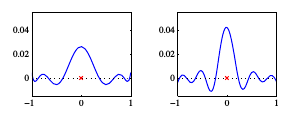

Fig.11 Examples of equiva- lent kernels k(x, x ) for x = 0 plotted as a function of x , corre- sponding (left) to the polynomial ba- sis functions and (right) to the sigmoidal basis functions shown in Figure 3.1. Note that these are localized functions of x even though the corresponding basis functions are nonlocal.

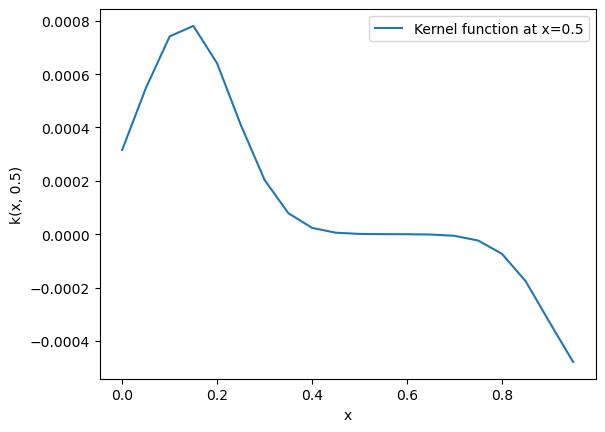

In [5]:
# Implementation of Equivalent Kernel in Bayesian Linear Regression without using NumPy

# Helper functions for basic operations

def dot_product(vec1, vec2):
    """Calculate the dot product of two vectors."""
    return sum(v1 * v2 for v1, v2 in zip(vec1, vec2))

def matrix_vector_product(matrix, vector):
    """Multiply a matrix by a vector."""
    return [dot_product(row, vector) for row in matrix]

def transpose(matrix):
    """Transpose a matrix."""
    return list(map(list, zip(*matrix)))

def identity_matrix(size):
    """Create an identity matrix of given size."""
    return [[1 if i == j else 0 for j in range(size)] for i in range(size)]

def inverse_matrix_2x2(matrix):
    """Compute the inverse of a 2x2 matrix."""
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    return [[matrix[1][1] / det, -matrix[0][1] / det],
            [-matrix[1][0] / det, matrix[0][0] / det]]

# Gaussian Basis Function
def gaussian_basis(x, center, width=0.1):
    """Calculate a Gaussian basis function."""
    return [math.exp(-(x - c)**2 / (2 * width**2)) for c in center]

# Generate synthetic data
def generate_data(n_points=10, noise_variance=0.05):
    """Generate synthetic sinusoidal data."""
    import random
    x_values = [i / n_points for i in range(n_points)]
    y_values = [math.sin(2 * math.pi * x) + random.gauss(0, noise_variance) for x in x_values]
    return x_values, y_values

# Kernel Function
def equivalent_kernel(phi, s_n_inverse, beta=1):
    """Calculate the equivalent kernel function k(x, x')."""
    def kernel(x, x_prime):
        phi_x = gaussian_basis(x, phi[0])
        phi_x_prime = gaussian_basis(x_prime, phi[0])
        return beta * dot_product(matrix_vector_product(s_n_inverse, phi_x), phi_x_prime)
    return kernel

# Main function to fit the model and calculate the kernel
def bayesian_linear_regression(x_train, y_train, centers, beta=1, alpha=1):
    """Perform Bayesian linear regression and compute the equivalent kernel."""
    # Basis function matrix
    phi = [gaussian_basis(x, centers) for x in x_train]
    phi_t = transpose(phi)
    
    # Compute S_N inverse (2x2 for simplicity)
    s_n_inverse = [[alpha + beta * dot_product(row, col) for col in phi_t] for row in phi_t]
    s_n = inverse_matrix_2x2(s_n_inverse)  # Inverse of S_N

    # Compute equivalent kernel
    kernel = equivalent_kernel(phi, s_n, beta)

    return kernel

# Visualize the kernel function
import matplotlib.pyplot as plt
import math

x_train, y_train = generate_data()
centers = [i / 5 for i in range(5)]

kernel_function = bayesian_linear_regression(x_train, y_train, centers)

# Plot kernel values for a fixed point
x_test = [i / 20 for i in range(20)]
kernel_values = [kernel_function(0.5, x) for x in x_test]

plt.plot(x_test, kernel_values, label='Kernel function at x=0.5')
plt.xlabel('x')
plt.ylabel('k(x, 0.5)')
plt.legend()
plt.show()
